In [1]:
def grad_cam(input_model, image, layer_name,H=224,W=224):
    cls = np.argmax(input_model.predict(image))
    #cls gives the index of the predicted class i.e. one with maximum probablity
    def normalize(x):
        """Utility function to normalize a tensor by its L2 norm"""
        return (x + 1e-10) / (K.sqrt(K.mean(K.square(x))) + 1e-10)
    """GradCAM method for visualizing input saliency."""
    y_c = input_model.output[0, cls]
    #y_c is a saliency map of the predicted class
    conv_output = input_model.get_layer(layer_name).output
    #conv_output is the last layer before fully connected layer .In this layer we find the importance of each feature map for a specific class by finding alpha.
    
    grads = K.gradients(y_c, conv_output)[0]
    #grads = normalize(grads)--------------------------------------------------------------------------------1
    gradient_function = K.function([input_model.input], [conv_output, grads])

    output, grads_val = gradient_function([image])
    output, grads_val = output[0, :], grads_val[0, :, :, :]

    weights = np.mean(grads_val, axis=(0, 1))#weights is the alpha here---------------------------------------2
    cam = np.dot(output, weights)
    #print (cam)

    cam = np.maximum(cam, 0)# it performs the function of Relu and eliminate negative weights------------------3
    
    #cam = resize(cam, (H, W))
    cam = zoom(cam,H/cam.shape[0])
    #cam = np.maximum(cam, 0)
    cam = cam / cam.max()
    return cam

    

1) grads represent gradients of y_c wrt to each feature map of last layer before fully connected layer 
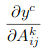

2)weigths represent 
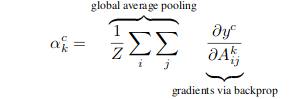
This weight represents apartial linearization of the deep network downstream from A, and captures the ‘importance’ of feature map k for a target class c

3)cam represent
![gradcamlc.png](attachment:gradcamlc.png)

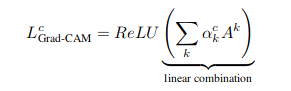

Demo of gradcam on skin cancer image:


Input Image
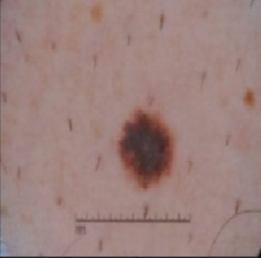

Output Image
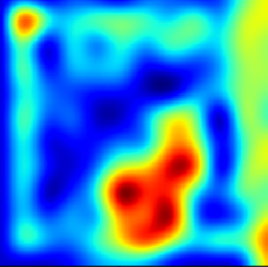